<a href="https://colab.research.google.com/github/0jipy/192kbps_colab_JIPY/blob/main/relu_MNIST_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST 손글씨 - 일반 Neural Network


In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)
import matplotlib.pyplot as plt

## 데이터 전처리

In [4]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

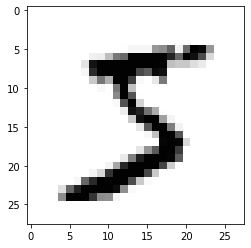

In [7]:
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [9]:
import sys
for x in X_train[0]:
    for i in x:
        sys.stdout.write(f'{i:3d}')
    sys.stdout.write('\n')


  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

In [10]:
# 0 ~ 1 사이의 값으로 정규화
X_train = X_train/255.0   #왜 265 아니지? 이거 255이유 있나?
X_test = X_test/255.0

In [11]:
# 3차원 데이터를 2차원, (데이터는 2차원을 1차원으로)
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [13]:
# One hot encoding  # 이 코드셀 이유 모르겠어. 카테고리컬
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train) # Y 대소문자 주의
Y_test = to_categorical(y_test)
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

모델 정의, 설정, 실행, 평가

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [23]:
model = Sequential([
    Dense(512, input_dim=784, activation='relu'),
    Dense(48, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 48)                24624     
                                                                 
 dense_5 (Dense)             (None, 10)                490       
                                                                 
Total params: 427,034
Trainable params: 427,034
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']
)

In [25]:
# 모델 최적화를 위한 설정
modelpath = 'model/best_mnist_dnn.h5'
checkpoint = ModelCheckpoint(modelpath, verbose=1, save_best_only=True)
early_stopping = EarlyStopping(patience =10)

In [26]:
hist = model.fit(
    X_train, Y_train, validation_split=0.2, 
    epochs=50, batch_size=200, verbose=0,
    callbacks=[checkpoint, early_stopping]
)


Epoch 00001: val_loss improved from inf to 0.16506, saving model to model/best_mnist_dnn.h5

Epoch 00002: val_loss improved from 0.16506 to 0.11612, saving model to model/best_mnist_dnn.h5

Epoch 00003: val_loss improved from 0.11612 to 0.09465, saving model to model/best_mnist_dnn.h5

Epoch 00004: val_loss improved from 0.09465 to 0.08429, saving model to model/best_mnist_dnn.h5

Epoch 00005: val_loss improved from 0.08429 to 0.08274, saving model to model/best_mnist_dnn.h5

Epoch 00006: val_loss did not improve from 0.08274

Epoch 00007: val_loss improved from 0.08274 to 0.08085, saving model to model/best_mnist_dnn.h5

Epoch 00008: val_loss did not improve from 0.08085

Epoch 00009: val_loss did not improve from 0.08085

Epoch 00010: val_loss did not improve from 0.08085

Epoch 00011: val_loss did not improve from 0.08085

Epoch 00012: val_loss did not improve from 0.08085

Epoch 00013: val_loss did not improve from 0.08085

Epoch 00014: val_loss did not improve from 0.08085

Epoch

In [27]:
from tensorflow.keras.models import load_model
best_model = load_model(modelpath)
best_model.evaluate(X_test, Y_test) # 대소문자 주의

313/313 [==============================] - 1s 2ms/step - loss: 0.0672 - accuracy: 0.9799


[0.06717221438884735, 0.9799000024795532]

## 학습과정 시각화

In [29]:
y_vloss = hist.history['val_loss']
y_acc = hist.history['accuracy']
x_len = np.arange(len(y_acc))

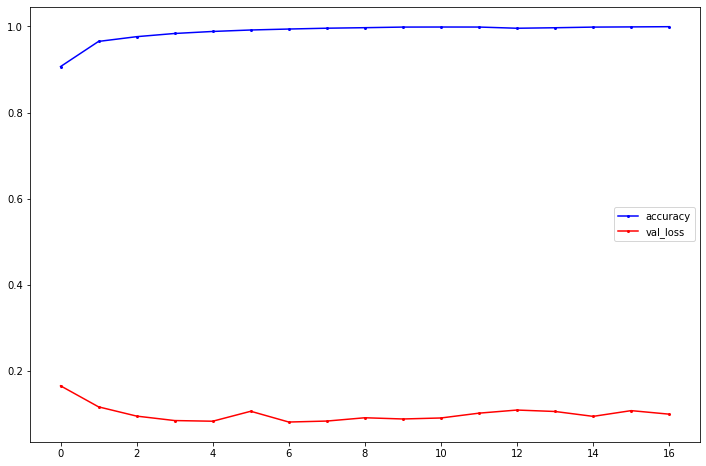

In [30]:
plt.figure(figsize=(12,8))
plt.plot(x_len, y_acc, 'bo-', markersize=2, label='accuracy')
plt.plot(x_len, y_vloss, 'ro-', markersize=2, label='val_loss')
plt.legend()
plt.show()